Q: Use the rnorm() function to generate a predictor X
 of length n
 = 100, as well as a noise vector ϵ
 of length n
 = 100.

In [112]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from itertools import combinations

np.random.seed(4)

X = np.random.normal(size=100)
error = np.random.normal(size=100)

Q: Generate a response vector Y
 of length n
 = 100 according to the model

In [39]:
y = 10 - 5*X + 6*X**2 + 3*X**3 + error

Q: Use the regsubsets() function to perform best subset selection in order to choose the best model containing the predictors X,X2,…,X10
. What is the best model obtained according to Cp
, BIC
, and adjusted R2
? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained. Note you will need to use the data.frame() function to create a single data set containing both X
 and Y
.

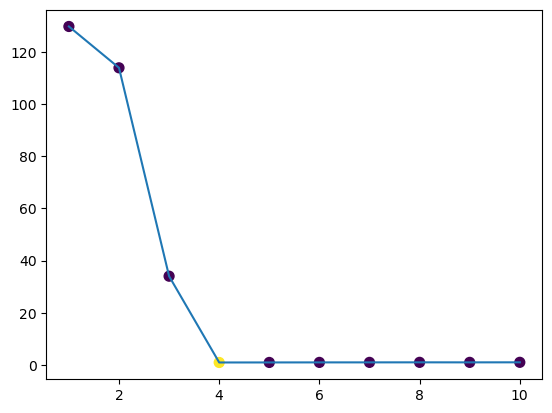

In [40]:
X_matrix = np.column_stack([X**d for d in range(10+1)])

model = sm.OLS(y, X_matrix).fit()

model_summary = model.summary()


subset_sizes = np.arange(1, 11)
cp_values = []

for size in subset_sizes:
    model_subset = sm.OLS(y, X_matrix[:, :size]).fit()
    residuals = y - model_subset.predict(X_matrix[:, :size])
    mse = np.mean(residuals**2)
    p = size + 1 
    cp = mse + 2 * p * mse / (X_matrix.shape[0] - p)
    cp_values.append(cp)

min_cp_index = np.argmin(cp_values)
min_cp_indicator = np.zeros_like(cp_values)
min_cp_indicator[min_cp_index] = 1

df_cp= pd.DataFrame({"cp": cp_values, "subset_size": subset_sizes, "min_cp": min_cp_indicator})

plt.plot(df_cp["subset_size"], df_cp["cp"])
plt.scatter(df_cp["subset_size"], df_cp["cp"], s=50, c=df_cp["min_cp"])
plt.show()

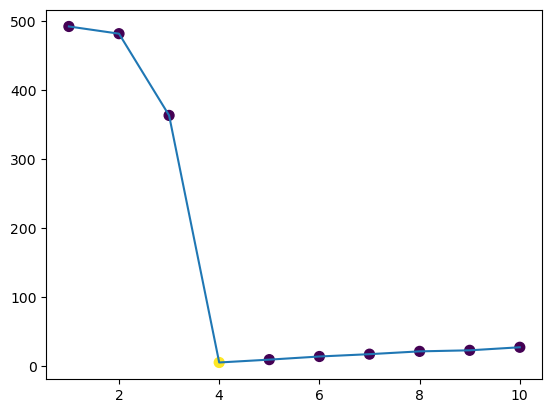

In [41]:
subset_sizes = np.arange(1, 11)
bic_values = []
for size in subset_sizes:
    model_subset = sm.OLS(y, X_matrix[:, :size]).fit()
    residuals = y - model_subset.predict(X_matrix[:, :size])
    mse = np.mean(residuals**2)
    p = size + 1
    n = X_matrix.shape[0]
    bic = n * np.log(mse) + p * np.log(n)
    bic_values.append(bic)

min_bic_index = np.argmin(bic_values)
min_bic_indicator = np.zeros_like(bic_values)
min_bic_indicator[min_bic_index] = 1

df_bic = pd.DataFrame({"bic": bic_values, "subset_size": subset_sizes, "min_bic": min_bic_indicator})

plt.plot(df_bic["subset_size"], df_bic["bic"])
plt.scatter(df_bic["subset_size"], df_bic["bic"], s=50, c=df_bic["min_bic"])
plt.show()

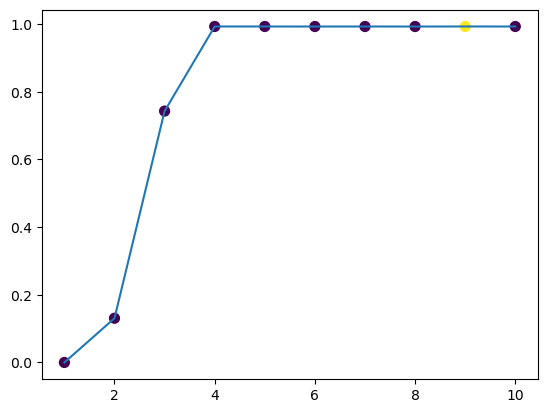

In [79]:
subset_sizes = np.arange(1, 11)
adj_r2_values = []
for size in subset_sizes:
    model_subset = sm.OLS(y, X_matrix[:, :size]).fit()
    adj_r2 = model_subset.rsquared_adj
    adj_r2_values.append(adj_r2)

max_adj_r2_index = np.argmax(adj_r2_values)
max_adj_r2_indicator = np.zeros_like(adj_r2_values)
max_adj_r2_indicator[max_adj_r2_index] = 1

df_r2 = pd.DataFrame({"adj_r2": adj_r2_values, "subset_size": subset_sizes, "max_adj_r2": max_adj_r2_indicator})

plt.plot(df_r2["subset_size"], df_r2["adj_r2"])
plt.scatter(df_r2["subset_size"], df_r2["adj_r2"], s=50, c=df_r2["max_adj_r2"])
plt.show()

Q: Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?

In [86]:
max_subset_size = 10
selected_variables = []
for i in range(1, max_subset_size + 1):
    model = sm.OLS(y, X_matrix[:, selected_variables + [i-1]]).fit()
    if i == 1:
        best_model = model
        best_cp = model.ssr / (X_matrix.shape[0] - 2)
    else:
        cp = model.ssr / (X_matrix.shape[0] - (i + 1))
        if cp < best_cp:
            best_model = model
            best_cp = cp
            selected_variables.append(i-1)

model_summary = best_model.summary()

cp_values = [model.ssr / (X_matrix.shape[0] - (i + 1)) for i in selected_variables]
min_cp_index = np.argmin(cp_values)

print(selected_variables[0])
print(min_cp_index)
print(model.params)

2
0
[ 40.21077371  -9.62295601 -29.26027598  10.32838418   8.64431924
  -3.09772951  -0.79514845   0.29051993]


In [87]:
selected_variables = []
for i in range(1, max_subset_size + 1):
    model = sm.OLS(y, X_matrix[:, selected_variables + [i-1]]).fit()
    if i == 1:
        best_model = model
        best_bic = model.bic
    else:
        bic = model.bic
        if bic < best_bic:
            best_model = model
            best_bic = bic
            selected_variables.append(i-1)

model_summary = best_model.summary()

bic_values = [model.bic for _ in selected_variables]
min_bic_index = np.argmin(bic_values)

print(selected_variables[0])
print(min_bic_index)
print(model.params)

2
0
[ 40.21077371  -9.62295601 -29.26027598  10.32838418   8.64431924
  -3.09772951  -0.79514845   0.29051993]


In [88]:
selected_variables = []
for i in range(1, max_subset_size + 1):
    model = sm.OLS(y, X_matrix[:, selected_variables + [i-1]]).fit()
    if i == 1:
        best_model = model
        best_adj_r2 = model.rsquared_adj
    else:
        adj_r2 = model.rsquared_adj
        if adj_r2 > best_adj_r2:
            best_model = model
            best_adj_r2 = adj_r2
            selected_variables.append(i-1)

model_summary = best_model.summary()

adj_r2_values = [model.rsquared_adj for _ in selected_variables]
max_adj_r2_index = np.argmax(adj_r2_values)

print(selected_variables[0])
print(max_adj_r2_index)
print(model.params)

1
0
[  0.79385391  40.2137898  -11.31762367 -29.35761921  11.38370214
   8.698107    -3.34611022  -0.80185559   0.30997084]


In [89]:
selected_variables = list(range(X_matrix.shape[1]))
for i in range(X_matrix.shape[1], max_subset_size, -1):
    model = sm.OLS(y, X_matrix[:, selected_variables]).fit()
    worst_variable = np.argmin(np.abs(model.pvalues[:-1]))
    selected_variables.pop(worst_variable)

model_summary = model.summary()

cp_values = []
for var_index in selected_variables:
    submodel = sm.OLS(y, X_matrix[:, selected_variables]).fit()
    cp = np.sum(submodel.resid**2) / (submodel.nobs - submodel.df_model)
    cp_values.append(cp)

min_cp_index = np.argmin(cp_values)

print(selected_variables[0])
print(min_cp_index)
print(model.params)

1
0
[ 9.97078326e+00 -5.43921453e+00  6.53138612e+00  4.10250055e+00
  8.69768538e-02 -4.00331842e-01 -4.32921098e-01  1.27882965e-02
  1.55905542e-01  4.98599804e-03 -1.50625325e-02]


In [90]:
bic_values = []
for var_index in selected_variables:
    submodel = sm.OLS(y, X_matrix[:, selected_variables]).fit()
    bic = submodel.bic
    bic_values.append(bic)

min_bic_index = np.argmin(bic_values)

print(selected_variables[0])
print(min_bic_index)
print(model.params)

1
0
[ 9.97078326e+00 -5.43921453e+00  6.53138612e+00  4.10250055e+00
  8.69768538e-02 -4.00331842e-01 -4.32921098e-01  1.27882965e-02
  1.55905542e-01  4.98599804e-03 -1.50625325e-02]


In [91]:
adj_r2_values = []
for var_index in selected_variables:
    submodel = sm.OLS(y, X_matrix[:, selected_variables]).fit()
    adj_r2 = submodel.rsquared_adj
    adj_r2_values.append(adj_r2)

max_adj_r2_index = np.argmax(adj_r2_values)

print(selected_variables[0])
print(max_adj_r2_index)
print(model.params)

1
0
[ 9.97078326e+00 -5.43921453e+00  6.53138612e+00  4.10250055e+00
  8.69768538e-02 -4.00331842e-01 -4.32921098e-01  1.27882965e-02
  1.55905542e-01  4.98599804e-03 -1.50625325e-02]


A:
Different selection methods and metrics result in different subsets of the predictors being selected.

Like with real data, the fact that the functional form of the selected model does not exactly match the functional form of the generating function (a cubic) is not necessarily a bad thing for prediction - the generating function might still be well-approximated, and the prediction error can still be low.

Q: Now fit a lasso model to the simulated data, again using X,X2,…,X10
 as predictors. Use cross-validation to select the optimal value of λ
. Create plots of the cross-validation error as a function of λ
. Report the resulting coefficient estimates, and discuss the results obtained.

C:\Users\daner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130.40904902418424, tolerance: 1.181760677583298
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\daner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6745872120982312, tolerance: 1.181760677583298
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\daner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.29416314575019, tolerance: 1.181760677583298
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\daner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: C

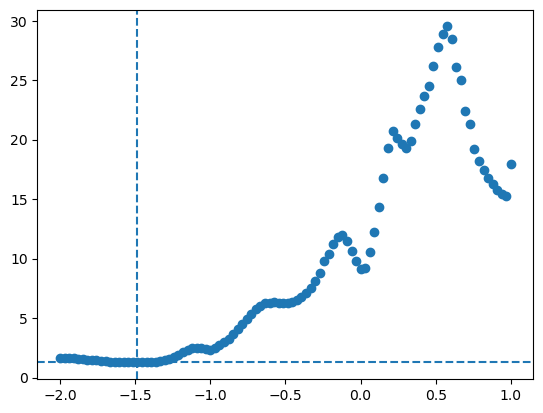

In [106]:
alphas = 10**np.linspace(1, -2, num=100)
model_lasso = LassoCV(alphas=alphas, cv=5)
model_lasso.fit(X_matrix, y)

plt.scatter(np.log10(model_lasso.alphas_), model_lasso.mse_path_.mean(axis=1))
plt.axvline(x=np.log10(model_lasso.alpha_), linestyle="--", label="Lambda min")
plt.axhline(y=min(model_lasso.mse_path_.mean(axis=1)), linestyle="--")
plt.show()

Q: Now generate a response vector Y
 according to the model Y=β0+β7X7+ϵ
, and perform best subset selection and the lasso. Discuss the results obtained

In [118]:
y = 10 + 5*X**7 + error

selected_variables = []
for i in range(1, max_subset_size + 1):
    model = sm.OLS(y, X_matrix[:, selected_variables + [i-1]]).fit()
    if i == 1:
        best_model = model
        best_cp = model.ssr / (X_matrix.shape[0] - 2)
    else:
        cp = model.ssr / (X_matrix.shape[0] - (i + 1))
        if cp < best_cp:
            best_model = model
            best_cp = cp
            selected_variables.append(i-1)

model_summary = best_model.summary()

cp_values = [model.ssr / (X_matrix.shape[0] - (i + 1)) for i in selected_variables]
min_cp_index = np.argmin(cp_values)

print(selected_variables[0])
print(min_cp_index)
print(model.params)

1
0
[ 12.32453306 -27.70898155  18.08175898   1.05823183   0.44746452
  -0.18302737   0.37998245]


In [119]:
selected_variables = []
for i in range(1, max_subset_size + 1):
    model = sm.OLS(y, X_matrix[:, selected_variables + [i-1]]).fit()
    if i == 1:
        best_model = model
        best_bic = model.bic
    else:
        bic = model.bic
        if bic < best_bic:
            best_model = model
            best_bic = bic
            selected_variables.append(i-1)

model_summary = best_model.summary()

bic_values = [model.bic for _ in selected_variables]
min_bic_index = np.argmin(bic_values)

print(selected_variables[0])
print(min_bic_index)
print(model.params)

1
0
[ 1.12100217e+01 -2.23853469e+01  1.16323446e+01  2.83706720e+00
  1.05455836e-02  1.31433778e-01]


In [120]:
selected_variables = []
for i in range(1, max_subset_size + 1):
    model = sm.OLS(y, X_matrix[:, selected_variables + [i-1]]).fit()
    if i == 1:
        best_model = model
        best_adj_r2 = model.rsquared_adj
    else:
        adj_r2 = model.rsquared_adj
        if adj_r2 > best_adj_r2:
            best_model = model
            best_adj_r2 = adj_r2
            selected_variables.append(i-1)

model_summary = best_model.summary()

adj_r2_values = [model.rsquared_adj for _ in selected_variables]
max_adj_r2_index = np.argmax(adj_r2_values)

print(selected_variables[0])
print(max_adj_r2_index)
print(model.params)

1
0
[ 3.93352864 12.47968405 -1.50201125 -2.06813388 -1.87774703  6.16555035
  0.27405904 -0.1371778 ]


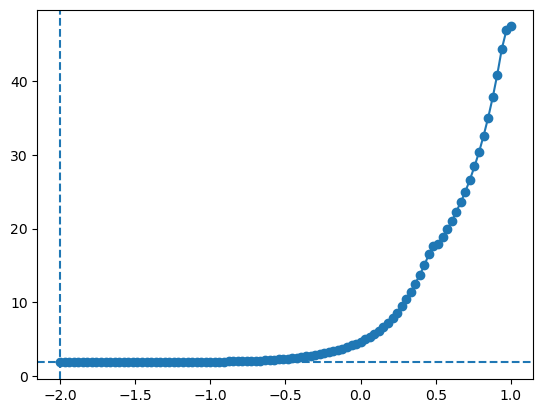

In [127]:
alphas = 10**np.linspace(1, -2, num=100)
model_lasso = LassoCV(alphas=alphas, cv=5)
model_lasso.fit(X_matrix, y)

lambda_values = model_lasso.alphas_
cv_mse_values = model_lasso.mse_path_.mean(axis=1)
nonzero_coeff_values = np.sum(model_lasso.coef_ != 0, axis=0)


plt.scatter(np.log10(lambda_values), cv_mse_values)
plt.plot(np.log10(lambda_values), cv_mse_values, label="Cross-Validation MSE")
plt.axvline(x=np.log10(model_lasso.alpha_), linestyle="--", label="Lambda min")
plt.axhline(y=min(cv_mse_values), linestyle="--")
plt.show()